# Curve fitting - Gauss-Newton Method for nonlinear regression

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Least-squares regression

Let's assume the given set of data is denoted as $(x_i, y_i)$, $i\in(0,N-1)$. Here the total number of data points is $N$. Note that here the index starts at 0 to be consistent with the zero-based index in Python. In lecture notes and the book, the index starts at 1. 

## Nonlinear regression

Up until now, we only considered linear regressions, polynomial regressions, and linearizable nonlinear regressions. For general nonlinear regression, the basic idea is the same, i.e., to determine the coefficients for the minimization of the sum of the squares of the residuals. Unlike linear regression, an iterative approach has to be used to calculate the coefficients. One such method is the Gauss-Newton method. 

Let the sought nonlinear regressional function be $f(x)$ and the data points can be written as
\begin{equation}
y_i = f(x_i; a_0,a_1, \ldots , a_m) + e_i
\end{equation}
where $a_0,a_1, \ldots , a_m$ are the $m+1$ parameters in the nonlinear function which need to be determined through least-squares regression. $e_i$ is the error for data point $i$. In vector form, the fitting parameters can be written as
\begin{equation}
\mathbf{A} = 
\begin{bmatrix}
           a_0\\
           a_1\\
           \vdots \\
           a_{N-1} 
         \end{bmatrix}
\end{equation}

\begin{equation}
\mathbf{E} = 
\begin{bmatrix}
           e_0\\
           e_1\\
           \vdots \\
           e_{N-1} 
         \end{bmatrix}
\end{equation}


The derivation of the Gauss-Newton method is as follows. For convience, the case of two paramters $a_0$ and $a_1$, i.e., $m$ = 1, is considred. The conclusion can be easily extended to general case. The nonlinear function can expanded around the paramter values using Taylor series as
\begin{equation}
f(x_i; a_0, a_1)_{s+1} = f(x_i; a_0, a_1)_{s} + \frac{\partial f(x_i; a_0, a_1)_{s}}{\partial a_0} \Delta a_0 + \frac{\partial f(x_i; a_0, a_1)_{s}}{\partial a_1} \Delta a_1 + ...
\end{equation}
Higher order terms can be omitted. Here, $s$ is the iteration number. The goal of the Gauss-Newton method is to perform iterations to improve the estimates of parameters $a_0$ and $a_1$. Note that from iteration $s$ to iteration $s+1$, the parameters have been changed, thus $f(x_i; a_0, a_1)_{s+1}$ and $f(x_i; a_0, a_1)_{s}$ have different values. That is the essence of the Taylor series expansion above. 

The changes of $a_0$ and $a_1$ between iterations can be written as
\begin{equation}
\Delta a_0 = a_{0,s+1}-a_{0,s}
\end{equation}

\begin{equation}
\Delta a_1 = a_{1,s+1}-a_{1,s}
\end{equation}

Plus the Taylor series expansion into the error equation above, one can get
\begin{equation}
y_i - f(x_i; a_0, a_1)_{s} = \frac{\partial f(x_i; a_0, a_1)_{s}}{\partial a_0} \Delta a_0 + \frac{\partial f(x_i; a_0, a_1)_{s}}{\partial a_1} \Delta a_1 + e_i
\end{equation}
for all data points $i$ = 0, 1, 2, ..., N-1. This equation can be compactly written in matrix form as
\begin{equation}
\mathbf{D} = \mathbf{J}_s \Delta \mathbf{A} + \mathbf{E}
\end{equation}
where vector $\mathbf{D}$ is made of the difference between the data point values and the predicted function values (at current iteration) as
\begin{equation}
\mathbf{D} = 
\begin{bmatrix}
           y_0 - f(x_0)_s \\
           y_1 - f(x_1)_s \\
           \vdots \\
           y_{N-1} - f(x_{N-1})_s 
         \end{bmatrix}
\end{equation}
The matrix $\mathbf{J}$ is the so-called Jacobian matrix which is made of the function $f(x)$'s partial derivatives with respect to the parameters $a_0$ and $a_1$. The matrix $\mathbf{J}$ has a dimension of $N \times 2$ because we have $N$ data points and 2 parameters. 
\begin{equation}
\mathbf{J}_s = 
   \begin{bmatrix}
           \partial f(x_0; a_0, a_1)_{s}/\partial a_0  & \partial f(x_0; a_0, a_1)_{s}/\partial a_1\\
           \partial f(x_1; a_0, a_1)_{s}/\partial a_0  & \partial f(x_1; a_0, a_1)_{s}/\partial a_1\\
           \vdots \\
           \partial f(x_{N-1}; a_0, a_1)_{s}/\partial a_0  & \partial f(x_{N-1}; a_0, a_1)_{s}\partial a_1
   \end{bmatrix}
\end{equation}

The vector $\Delta \mathbf{A}$ has a length of 2 (because we have 2 parameters) and is defined as
\begin{equation}
\Delta \mathbf{A} = 
   \begin{bmatrix}
           \Delta a_0 \\
           \Delta a_1 
   \end{bmatrix}
\end{equation}

This vector equation can be treated as a linear regression with data points $(\mathbf{J}, \mathbf{D})$ and $\Delta \mathbf{A}$ is the linear regression parameter vector. \mathbf{E} is the error. Using the same least-squares regression to this problem, one can write the nomal equation (in vector form of course) as
\begin{equation}
\left( \mathbf{J}_s^T \mathbf{J}_s \right) \Delta \mathbf{A} = \mathbf{J}_s^T   \mathbf{D}
\end{equation}
This is a $2 \times 2$ linear equation system. It can be solved for $\Delta \mathbf{A}$ as
\begin{equation}
\Delta \mathbf{A} = \left( \mathbf{J}_s^T \mathbf{J}_s \right)^{-1} \mathbf{J}_s^T   \mathbf{D}
\end{equation}


The following example fits a Monod-type equation (or saturation-growth-rate equation) with a given set of data points:
\begin{equation}
y = a_0 \frac{x}{a_1 + x}
\end{equation}
Here, $y$ is the specific growth rate of microorganisms, $a_0$ is the maximum specific growth rate, $x$ is the concentration of the limiting nutrient, $a_1$ is the half-saturation constant, i.e., the value of $x$ when the growth rate is half of the maximum. 

The residual is for each data points is
\begin{equation}
e_i = y_i - a_0 \frac{x_i}{a_1 + x_i}
\end{equation}
Then the Jacobian $J$, which is $e_i$ taking derivatieve with respect to $a_j$, $j$=0 or 1.
\begin{equation}
\frac{\partial e_i}{\partial a_0} = -\frac{x_i}{a_1+x_i}
\end{equation}
and 
\begin{equation}
\frac{\partial e_i}{\partial a_1} = \frac{a_0 x_i}{\left(a_1+x_i\right)^2}
\end{equation}

The Gauss-Newton method iteration to update the paramters $a_j$ is then
\begin{equation}
\mathbf{A}^{s+1} = \mathbf{A}^{s+1} + \left(\mathbf{J}^T \mathbf{J} \right)^{-1} \mathbf{J}^T \mathbf{e}\left(\mathbf{A}^{s+1} \right)
\end{equation}
where $s$ is the iteration number and $s$ = 0, 1, 2, $\ldots$. 

As in any iterative schemes, there should be a stopping criterion $\epsilon$. For example, one criterion can be the relative error between two successive iterations:
\begin{equation}
\left| \frac{a_j^{s+1}-a_j^{s}}{a_j^{s+1}}  \right| < \epsilon
\end{equation}


Initial guess for the two parameters: 
 [[0.2]
 [1. ]]
iter =  0
(abs((A[0]-A_old[0])/A[0]) =  [0.56025567]
(abs((A[1]-A_old[1])/A[1]) =  [0.4593264]
iter =  1
(abs((A[0]-A_old[0])/A[0]) =  [0.00394693]
(abs((A[1]-A_old[1])/A[1]) =  [0.30831006]
iter =  2
(abs((A[0]-A_old[0])/A[0]) =  [0.00198786]
(abs((A[1]-A_old[1])/A[1]) =  [0.03050907]
iter =  3
(abs((A[0]-A_old[0])/A[0]) =  [0.00013531]
(abs((A[1]-A_old[1])/A[1]) =  [0.00109377]
iter =  4
(abs((A[0]-A_old[0])/A[0]) =  [3.28763122e-06]
(abs((A[1]-A_old[1])/A[1]) =  [2.35887229e-05]
iter =  5
(abs((A[0]-A_old[0])/A[0]) =  [6.97212526e-08]
(abs((A[1]-A_old[1])/A[1]) =  [4.98374892e-07]
Final results for the two parameters: 
 [[0.45758489]
 [1.45980935]]


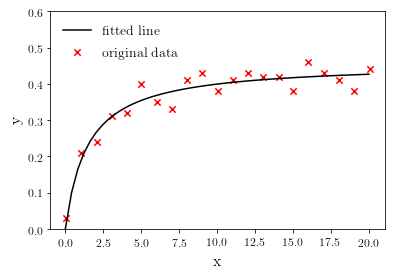

In [13]:
import scipy
import numpy as np
import math
import scipy.misc
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#data points
x=np.array([0.07, 1.04,2.06, 3.06, 4.09, 5.01, 6.05, 7.05, 8.02, 9.03, 10.03, 11.07,12.01,13.02,14.08, 15.01, 16.01, 17.04, 18.01, 19.03, 20.05])
y=np.array([0.03, 0.21, 0.24, 0.31, 0.32, 0.40, 0.35, 0.33, 0.41, 0.43, 0.38, 0.41, 0.43, 0.42, 0.42, 0.38, 0.46, 0.43, 0.41, 0.38, 0.44])

#max iterations
max_iter = 200

#convergence criterion for the fitting parameters
eps = 1E-6

rows = len(x) #number of data points
cols = 2      #two parameters a0 and a1

A = np.array([[.2],[1.0]]) # original guess for A
print("Initial guess for the two parameters: \n",A)

J = np.zeros((rows,cols)) # Jacobian matrix from r
r = np.zeros((rows,1)) #r equations

# component of the Jacobian matrix: df_da0
def df_da0(A1,xi):
    return -(xi/(A1+xi))

# component of the Jacobian matrix: df_da1
def df_da1(A0,A1,xi):
    return ((A0*xi)/((A1+xi)**2))

#calculate the residual e for a given data points with current parameters
def residual(x,y,A0,A1):
    return (y - ((A0*x)/(A1+x)))

#the Gauss-Newton method iteration
iter = 0
while iter <= max_iter:
    print("iter = ", iter)
    A_old = A        #save the parameter values from previous iteration
        
    #calculate Jacobian matrix J and residual vector e for current iteration.
    for j in range(rows):                      #loop over all data points
        r[j,0] = residual(x[j],y[j],A[0],A[1]) #
        J[j,0] = df_da0(A[1],x[j])
        J[j,1] = df_da1(A[0],A[1],x[j])

    Jt =  J.T    #get the transpose of J
    A = A - np.dot(np.dot(np.linalg.inv(np.dot(Jt,J)),Jt),r)
    
    #convergence check
    print("(abs((A[0]-A_old[0])/A[0]) = ", (abs((A[0]-A_old[0])/A[0])))
    print("(abs((A[1]-A_old[1])/A[1]) = ", (abs((A[1]-A_old[1])/A[1])))
    
    if((abs((A[0]-A_old[0])/A[0])<eps) or (abs((A[1]-A_old[1])/A[1])<eps)):
        break

    iter += 1

print("Final results for the two parameters: \n", A)    
    
#plot the data and fitted curve
# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
x_pred = np.linspace(0,20,50)
y_pred = A[0][0]*x_pred/(A[1][0]+x_pred) 
np.reshape(y_pred, (1,50))

# plotting the regression line 
plt.plot(x_pred, y_pred, color = "k", label='fitted line') 

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

plt.ylim([0, 0.6])

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.show() 

For comparison, the following code uses the "curve_fit" function in [SciPy (Scientific Python)](https://www.scipy.org)'s optimize library, which uses non-linear least squares to fit a function for a give set of data. You can compare the resulted values of $a_0$ and $a_1$ with those from above. They should match. 

In [18]:
import numpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#data points
x=np.array([0.07, 1.04,2.06, 3.06, 4.09, 5.01, 6.05, 7.05, 8.02, 9.03, 10.03, 11.07,12.01,13.02,14.08, 15.01, 16.01, 17.04, 18.01, 19.03, 20.05])
y=np.array([0.03, 0.21, 0.24, 0.31, 0.32, 0.40, 0.35, 0.33, 0.41, 0.43, 0.38, 0.41, 0.43, 0.42, 0.42, 0.38, 0.46, 0.43, 0.41, 0.38, 0.44])

#define the fitting function
def f(x, a0, a1):
    return a0*x/(a1+x)

fitting_parameters, covariance = curve_fit(f, x, y)
a0, a1 = fitting_parameters

print("a0, a1 = ", a0, a1)

a0, a1 =  0.4575848670975289 1.4598088795953368
